In [1]:
import pandas as pd
import os
%pylab inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12.0, 9.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

Populating the interactive namespace from numpy and matplotlib


In [2]:
try:
    TRESORIT_DIR = os.environ['TRESORIT_DIR']
except KeyError:
    TRESORIT_DIR = '/home/paprika/Tresors'
    
csv_file = os.path.join(TRESORIT_DIR, 'CivilServant/projects/wikipedia-integration/gratitude-study/datasets/power_analysis/thanker_power_analysis_data_for_sim_treatment_20180306.csv')
df = pd.read_csv(csv_file, index_col=0)


In [3]:
df.columns

Index(['ar_is_autoreview', 'de_is_autoreviewer', 'de_is_days_enough',
       'de_is_edits_enough', 'fa_is_days_enough', 'fa_is_edits_enough', 'lang',
       'pl_is_editor', 'ug_group', 'user_editcount', 'user_id', 'user_name',
       'user_registration', 'block_actions_90_pre_treatment',
       'block_actions_90_post_treatment', 'num_reverts_90_pre_treatment',
       'num_reverts_90_post_treatment', 'support_talk_90_pre_treatment',
       'support_talk_90_post_treatment', 'project_talk_90_pre_treatment',
       'project_talk_90_post_treatment', 'wikithank_90_pre_treatment',
       'wikithank_90_post_treatment', 'wikilove_90_pre_treatment',
       'wikilove_90_post_treatment'],
      dtype='object')

In [40]:
#nan values

In [41]:
nulls = pd.isnull(df)

In [50]:
df['block_actions_90_post_treatment'] = df['block_actions_90_post_treatment'].fillna(0)

In [42]:
nulls.sum()

ar_is_autoreview                   21786
de_is_autoreviewer                  5228
de_is_days_enough                   5228
de_is_edits_enough                  5228
fa_is_days_enough                  20990
fa_is_edits_enough                 20990
lang                                   0
pl_is_editor                       18881
ug_group                            1305
user_editcount                      3923
user_id                                0
user_name                              0
user_registration                      0
block_actions_90_pre_treatment     22108
block_actions_90_post_treatment    22110
num_reverts_90_pre_treatment           0
num_reverts_90_post_treatment          0
support_talk_90_pre_treatment          0
support_talk_90_post_treatment         0
project_talk_90_pre_treatment          0
project_talk_90_post_treatment         0
wikithank_90_pre_treatment             0
wikithank_90_post_treatment            0
wikilove_90_pre_treatment          20481
wikilove_90_post

In [43]:
no_edit_count = df[pd.isnull(df['user_editcount'])]
# people that have no edit count are from languages where qualification is not based on edit count

In [44]:
no_edit_count['lang'].value_counts()

pl    3414
ar     509
Name: lang, dtype: int64

In [45]:
dvs = ['lang',
       'block_actions_90_pre_treatment',
       'block_actions_90_post_treatment', 'num_reverts_90_pre_treatment',
       'num_reverts_90_post_treatment', 'support_talk_90_pre_treatment',
       'support_talk_90_post_treatment', 'project_talk_90_pre_treatment',
       'project_talk_90_post_treatment', 'wikithank_90_pre_treatment',
       'wikithank_90_post_treatment', 'wikilove_90_pre_treatment',
       'wikilove_90_post_treatment']

In [46]:
dv_df = df[dvs].fillna(0)

In [47]:
dv_df.groupby('lang').describe().T

lang                                           ar            de            fa  \
block_actions_90_post_treatment count  509.000000  17067.000000   1305.000000   
                                mean     0.000000      0.800316      0.689655   
                                std      0.000000     29.251616      8.672789   
                                min      0.000000      0.000000      0.000000   
                                25%      0.000000      0.000000      0.000000   
                                50%      0.000000      0.000000      0.000000   
                                75%      0.000000      0.000000      0.000000   
                                max      0.000000   3144.000000    223.000000   
block_actions_90_pre_treatment  count  509.000000  17067.000000   1305.000000   
                                mean     0.000000      0.779340      0.849042   
                                std      0.000000     29.285142      9.085959   
                                min      0.000000      0.000000      0.000000   
                                25%      0.000000      0.000000      0.000000   
                                50%      0.000000      0.000000      0.000000   
                                75%      0.000000      0.000000      0.000000   
                                max      0.000000   3270.000000    168.000000   
num_reverts_90_post_treatment   count  509.000000  17067.000000   1305.000000   
                                mean     0.422397      5.713306     24.026820   
                                std      3.009887     84.904208    332.919738   
                                min      0.000000      0.000000      0.000000   
                                25%      0.000000      0.000000      0.000000   
                                50%      0.000000      0.000000      0.000000   
                                75%      0.000000      0.000000      0.000000   
                                max     54.000000   5736.000000  11371.000000   
num_reverts_90_pre_treatment    count  509.000000  17067.000000   1305.000000   
                                mean     0.742633      5.982012     15.872031   
                                std      5.468824     81.912927    132.516695   
                                min      0.000000      0.000000      0.000000   
                                25%      0.000000      0.000000      0.000000   
                                50%      0.000000      0.000000      0.000000   
...                                           ...           ...           ...   
wikilove_90_post_treatment      std      0.146823      0.000000      3.006838   
                                min      0.000000      0.000000      0.000000   
                                25%      0.000000      0.000000      0.000000   
                                50%      0.000000      0.000000      0.000000   
                                75%      0.000000      0.000000      0.000000   
                                max      3.000000      0.000000    105.000000   
wikilove_90_pre_treatment       count  509.000000  17067.000000   1305.000000   
                                mean     0.033399      0.000000      0.140996   
                                std      0.308770      0.000000      2.220591   
                                min      0.000000      0.000000      0.000000   
                                25%      0.000000      0.000000      0.000000   
                                50%      0.000000      0.000000      0.000000   
                                75%      0.000000      0.000000      0.000000   
                                max      4.000000      0.000000     66.000000   
wikithank_90_post_treatment     count  509.000000  17067.000000   1305.000000   
                                mean     0.335953      1.709322      2.144061   
                                std      2.922069     16.536641     20.380937   
                               

lang
ar    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
de    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
fa    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
pl    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

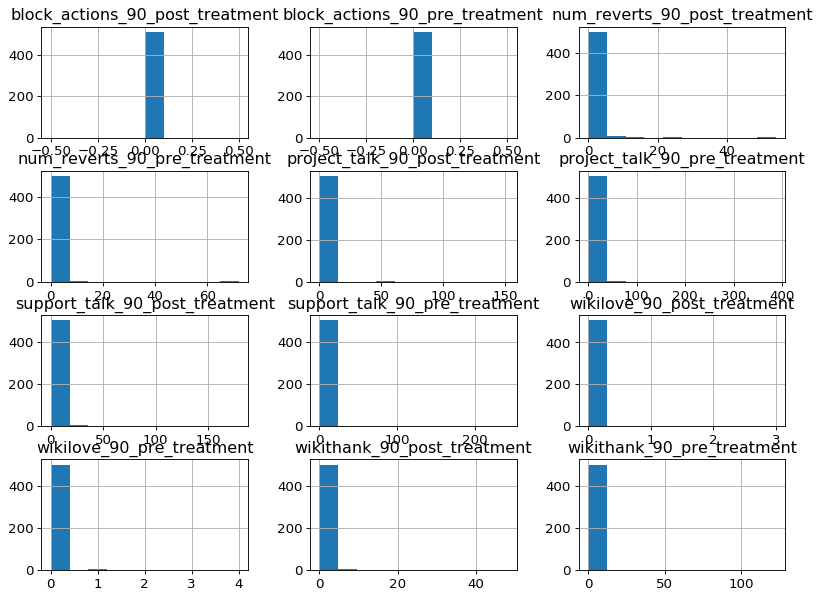

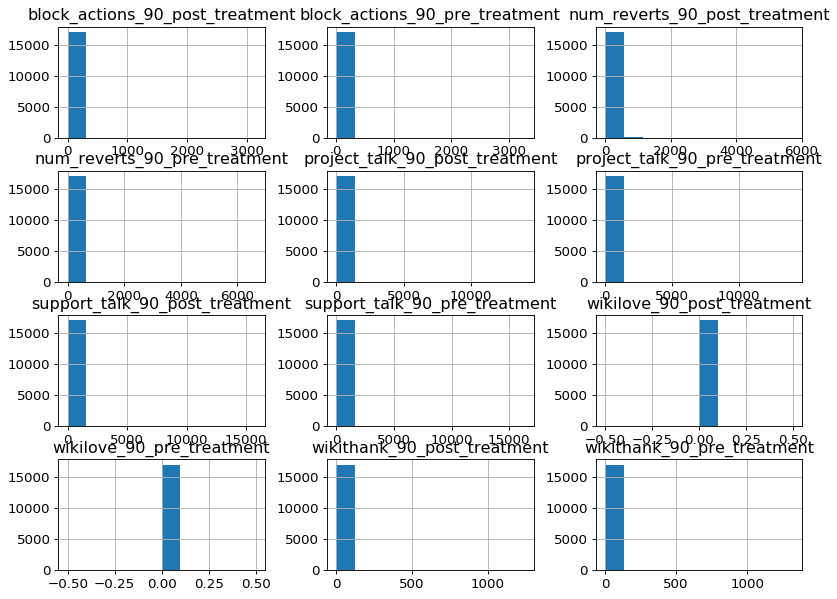

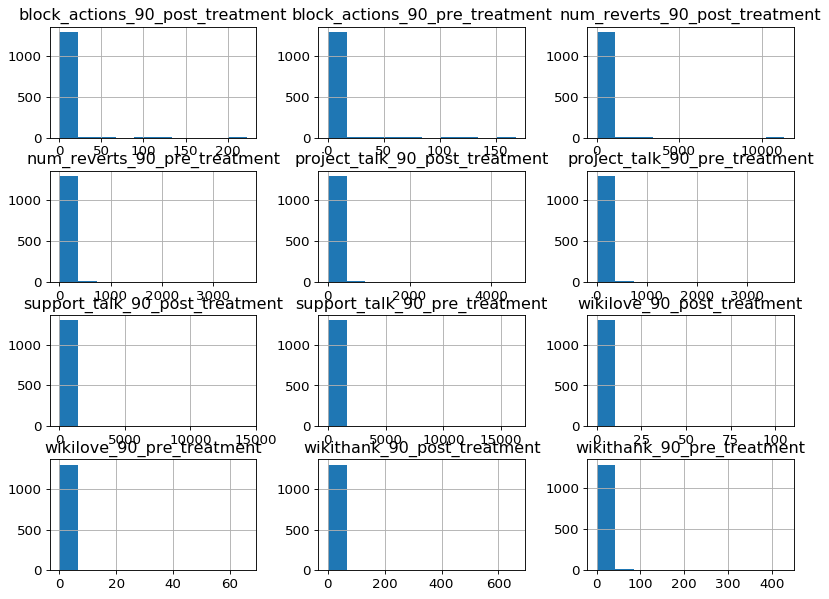

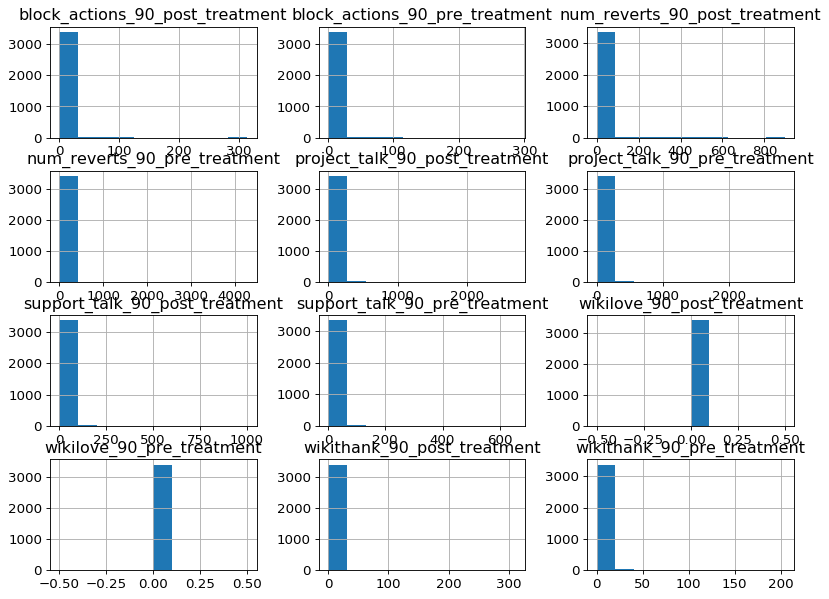

In [48]:
dv_df.groupby('lang').hist()